In [18]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import entropia

In [19]:
print(pd.__version__)

1.4.1


In [20]:
carpeta="data/Only_training_hipotesis_salida/"

## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [21]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [22]:
print(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

data/Only_training_hipotesis_salida/entropia/resultados_entropiaZSCORE_Transponse.pickle


In [23]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [24]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,443,entailment_entailment,"[6.813, 5.957, 6.615, 7.644, 4.949, 5.807, 6.3...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,38,entailment_neutral,"[7.855, 6.789, 5.322, 6.972, 6.224, 5.787, 4.7...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,9,entailment_contradiction,"[6.305, 4.0, 4.585, 4.644, 4.755, 6.406, 4.75,...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,54,neutral_entailment,"[5.322, 7.018, 7.225, 6.563, 6.714, 2.676, 4.5...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,339,neutral_neutral,"[6.059, 6.044, 7.286, 5.322, 7.349, 6.696, 5.9...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,229,neutral_neutral,"[5.773, 5.533, 5.929, 6.596, 6.942, 5.492, 5.2...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,779,neutral_contradiction,"[6.533, 7.193, 6.557, 6.366, 6.322, 4.322, 5.3...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,49,contradiction_entailment,"[6.059, 5.189, 6.226, 6.324, 6.713, 6.228, 2.3...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,236,contradiction_neutral,"[6.145, 7.006, 7.365, 5.977, 4.585, 6.382, 5.2...",1


In [25]:
dfn=dfn.assign(relacion=dfn["Subtotal"]/dfn["Total"])
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase,relacion
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,443,entailment_entailment,"[6.813, 5.957, 6.615, 7.644, 4.949, 5.807, 6.3...",0,0.904082
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,38,entailment_neutral,"[7.855, 6.789, 5.322, 6.972, 6.224, 5.787, 4.7...",0,0.077551
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,9,entailment_contradiction,"[6.305, 4.0, 4.585, 4.644, 4.755, 6.406, 4.75,...",0,0.018367
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,54,neutral_entailment,"[5.322, 7.018, 7.225, 6.563, 6.714, 2.676, 4.5...",0,0.127059
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,339,neutral_neutral,"[6.059, 6.044, 7.286, 5.322, 7.349, 6.696, 5.9...",0,0.797647
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,229,neutral_neutral,"[5.773, 5.533, 5.929, 6.596, 6.942, 5.492, 5.2...",1,0.214019
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,779,neutral_contradiction,"[6.533, 7.193, 6.557, 6.366, 6.322, 4.322, 5.3...",1,0.728037
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,49,contradiction_entailment,"[6.059, 5.189, 6.226, 6.324, 6.713, 6.228, 2.3...",1,0.044104
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,236,contradiction_neutral,"[6.145, 7.006, 7.365, 5.977, 4.585, 6.382, 5.2...",1,0.212421


In [26]:
etiquetas=['entailment','neutral','contradiction']

In [27]:
dfn_sinparafraseo=dfn[dfn["Paraphrase"]==0]
dfn_conparafraseo=dfn[dfn["Paraphrase"]==1]

# Vamos a dibujar la relación de aciertos (grupal) y errores

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

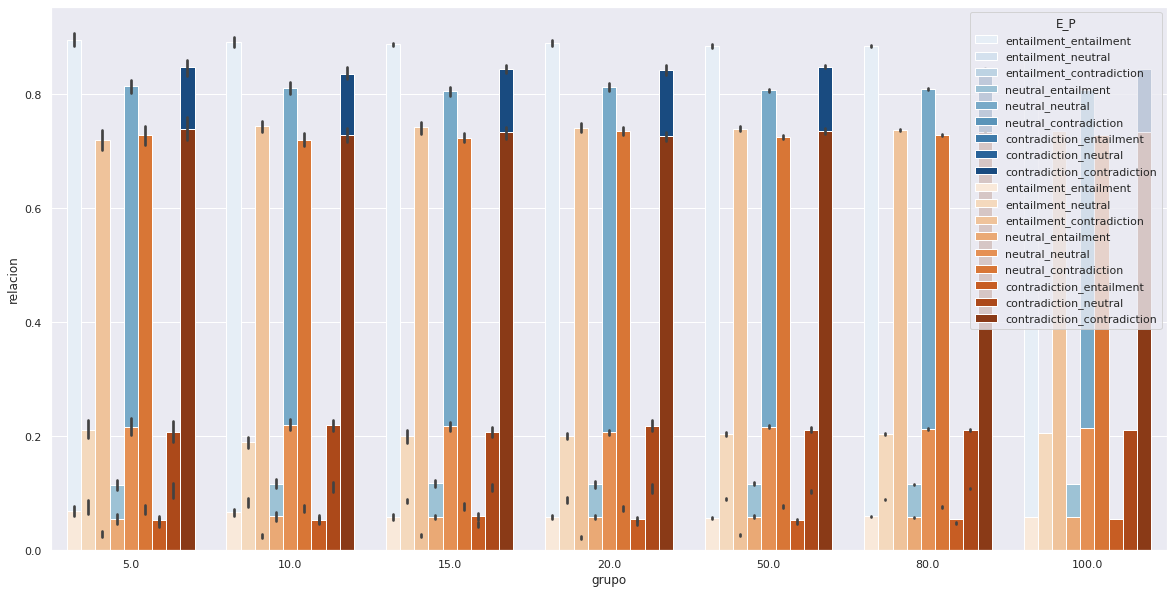

In [28]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_sinparafraseo,x="grupo",y="relacion", hue="E_P",palette="Blues")
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P",palette="Oranges")

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

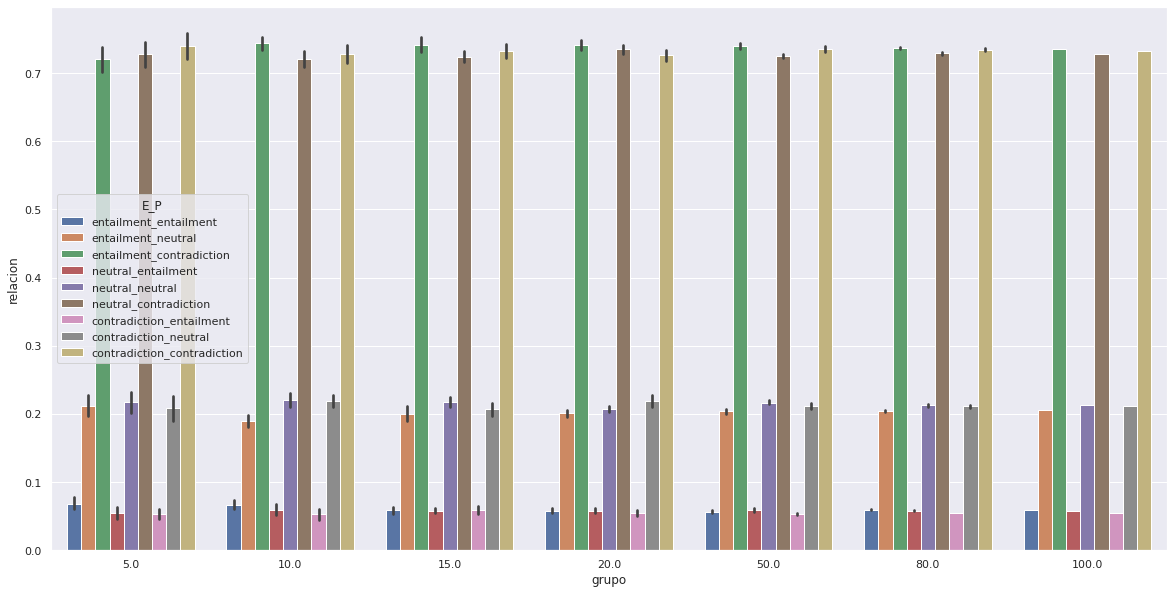

In [29]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P")

## Los anteriores resultados muestran que en cada muestreo hay una gran diferencia de los aciertos vs los errores un promedio de 80 % para los casos de entailment_entailment, neutral_neutral y contradiction_contradiction.

## Por otro lado, existe un porcentaje alto (relativamente) de los X_neutral, es decir que a partir del texto no se logré decidir si es entailment o contradiction. 18% promedio de errores cuando en realidad es entailment y predice neutralidad y 12% promedio cuando debería ser contradiction. lo mismo ocurre cuando es neutralidad y predice entailment o contradiction con 10% cada uno. Y en los ultimos casos donde se parte de un entailment y predice una contradiction con un 5% y que con un target contradiction lleva a una prediccion de entailment con 5%.

##


In [30]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Matriz de alineamiento
# Procesar todos los archivos p*.pickle para agregar columnas que obtengan los POS que tienen más que un umbral

In [31]:
muestreos=['0.05','0.1','0.15','0.2','0.5','0.8','1']

In [32]:
#POS donde encuentra coincidencia
#pos=['DET','AUX','NOUN','PROPN','CONJ','VERB','ADP','ADV','NUM','ADJ','PART','PRON','X','CCONJ','PUNCT','INTJ','SYM']

In [33]:
pos=['NOUN','VERB','ADP','ADV','ADJ']

In [34]:
# De acuerdo al análisis estadístico se obtiene que el umbral es de 0.5
umbral=0.5

In [35]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'minimo':[],'maximo':[],'3quartile':[]}
for g in muestreos:
    a=glob.glob(carpeta+'p*_'+g+'_*.pickle')
    for e in a:
        min_max=[]
        temp=pd.read_pickle(e)
        df=temp.copy()
        temp=temp.assign(ma_umbral="")
        for indice,strings in df.iterrows():
            t=strings['Text']
            h=strings['Hipotesis']
            matriz=strings['M_Align']
            matriz_c=matriz[1:len(t)-1,1:len(h)-1]
            min_max.extend(matriz_c.flatten())
            # Se coloca el máximo de tokens de acuerdo a la configuración del parafraseo
            if(len(t[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:42])
            elif(len(h[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:42],index=t[1:-1])
            else:
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
            c_a=p1_df1.columns
            data=pd.DataFrame("",columns=pos,index=pos)
            for i,strings2 in p1_df1.iterrows():
                for j in range(len(c_a)):
                    if(strings2[j]>umbral):
                        if(i.split(',')[1][:-1]!='' and c_a[j].split(',')[1][:-1]!='' and i.split(',')[1][:-1] in pos and c_a[j].split(',')[1][:-1] in pos):
                            data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]=str(data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]])+","+str(strings2[j])
            temp.at[indice,'ma_umbral']=data
            temp.at[indice,'target_prediction']=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])+"_"+mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        temp.to_pickle(e)
        new_data['Docs'].append(e)
        new_data['grupo'].append(g)
        new_data['datos'].append(min_max[:])
        new_data['3quartile'].append(np.quantile(np.asarray(min_max),q=0.75))
        new_data['minimo'].append(np.min(np.asarray(min_max)))
        new_data['maximo'].append(np.max(np.asarray(min_max)))
        min_max.clear()
df_resume=pd.DataFrame(new_data)
df_resume.to_pickle(carpeta+"align/data_POS_ALIGN.pickle")

# Identificación de umbral de alineamiento para obtener el 60% de los valores mayores al umbral

In [37]:
df=pd.read_pickle(carpeta+"align/data_POS_ALIGN.pickle")

In [38]:
df

,Docs,grupo,datos,minimo,maximo,3quartile
0,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.02611161, 0.06983099, 0.014831392, 0.115094...",0.0,8.701317,0.452526
1,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.02611161, 0.045506727, 0.0344693, 0.0148142...",0.0,8.031302,0.447428
2,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.0026690778, 0.0, 0.017571013, 0.0026690778,...",0.0,8.351706,0.453190
3,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.0026690778, 0.045506727, 0.014831392, 0.026...",0.0,8.701317,0.460853
4,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.0048709577, 0.6758172, 0.026913851, 0.12765...",0.0,8.045232,0.450959
...,...,...,...,...,...,...
116,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.012559852, 0.020396667, 0.01034...",0.0,10.416420,0.452137
117,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.0, 4.0551147, 0.09437341, 0.23155177, 1.255...",0.0,9.173684,0.452219
118,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.045506727, 0.03146654, 0.026111...",0.0,10.416420,0.450407
119,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.047737908, 1.3148733, 0.11252676, 1.3301198...",0.0,10.416420,0.452526


In [39]:
umbral=df['3quartile'].mean()
umbral

0.4509272250877924

In [40]:
data = df['datos'][0]
data.sort()
len(data)

74331

In [41]:
#Vamos a eliminar los ceros
nueva_data=[]
for e in data:
    if e!=0.0:
        nueva_data.append(e)
print(len(nueva_data))

72655


In [42]:
#Como ya esta ordenado nos vamos a quedar con el 40% de los datos y el ultimo será el umbral
nd=nueva_data[:round(len(nueva_data)*0.5)]
nd[-1]

0.07736365

In [43]:
np.median(nueva_data)

0.07736365

In [44]:
print(np.quantile(nueva_data,q=0.25))
print(np.quantile(nueva_data,q=0.5))
print(np.quantile(nueva_data,q=0.75))
print(np.quantile(nueva_data,q=1))

0.01938219927251339
0.07736364752054214
0.46608850359916687
8.701317


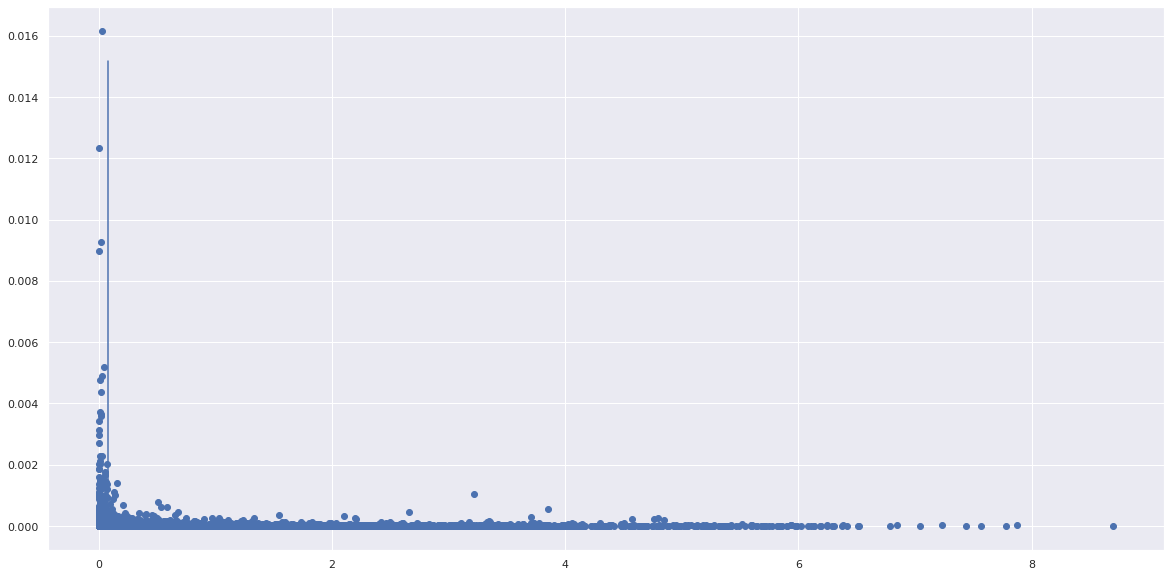

In [45]:
# Vamos a dibujar el umbral y la distribución de los datos
min_d=min(nueva_data)
max_d=max(nueva_data)
tamanio=len(nueva_data)
unicos = list(set(nueva_data))
y = [ nueva_data.count(x)/tamanio for x in unicos]
fig, ax = plt.subplots()
ax.scatter(x = unicos, y = y)
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9)
plt.show() #dibujamos el histograma

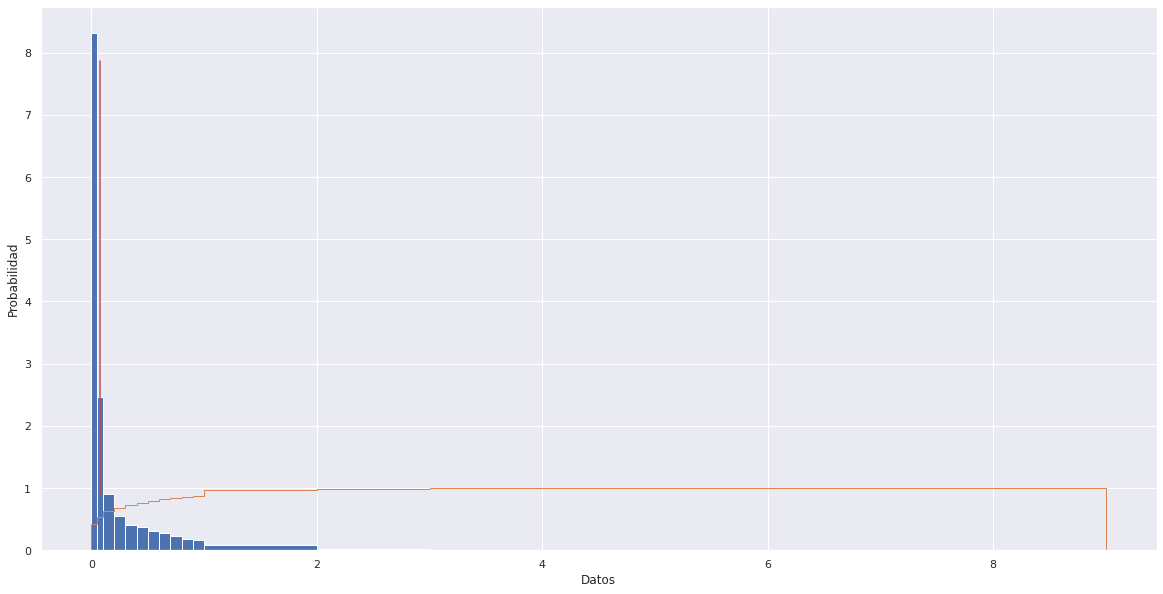

In [46]:
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True)
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True, cumulative=True, label='CDF', histtype='step')
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9, color = "r")   
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show() 

# De acuerdo al umbral obtener pares de palabras del texto y la hipótesis mayores a este (1)

In [47]:
muestreos

['0.05', '0.1', '0.15', '0.2', '0.5', '0.8', '1']

In [48]:
a=glob.glob(carpeta+'p*_'+muestreos[1]+'_*.pickle')
a

['data/Only_training_hipotesis_salida/pTEST_new_0.1_5.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_19.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_0.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_10.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_3.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_11.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_6.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_7.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_8.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_9.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_4.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_15.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_2.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_13.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_16.cs

In [49]:
dfm=pd.read_pickle(a[0])
dfm

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,PROPN}, the{the,DET}, dog{dog,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.3574316, 0.01616...","[0.94976944, 0.04257332, 0.0076571237]","[1.0, 0.0, 0.0]",0,9763,entailment,entailment,NOUN ...,entailment_entailment
1,1,"[NULL{null,PROPN}, this{this,DET}, off{off,ADP...","[NULL{null,PROPN}, a{a,DET}, ferrari{ferrari,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2894752, 0.10357...","[0.00011496611, 0.0008562623, 0.9990288]","[0.0, 0.0, 1.0]",0,2285,contradiction,contradiction,...,contradiction_contradiction
2,2,"[NULL{null,PROPN}, a{a,DET}, motorcyclist{moto...","[NULL{null,PROPN}, the{the,DET}, motorcyclist{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.24559669, 0.0161...","[0.8714632, 0.0954605, 0.033076342]","[1.0, 0.0, 0.0]",0,3332,entailment,entailment,NOUN...,entailment_entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ta...","[NULL{null,PROPN}, the{the,DET}, woman{woman,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17077179, 0.0161...","[0.0003480185, 0.0010165967, 0.99863535]","[0.0, 1.0, 0.0]",0,3561,contradiction,neutral,...,neutral_contradiction
4,4,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, or...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.11185...","[0.0014225668, 0.05054894, 0.94802845]","[0.0, 0.0, 1.0]",0,7335,contradiction,contradiction,...,contradiction_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.1707...","[0.024472838, 0.008942439, 0.96658474]","[1.0, 0.0, 0.0]",1,9747,contradiction,entailment,NOUN VERB ADP ...,entailment_contradiction
1334,1334,"[NULL{null,ADJ}, children{child,NOUN}, play{pl...","[NULL{null,ADJ}, two{two,NUM}, washers{washer,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.29528093, 0.01119...","[0.0050912746, 0.4111361, 0.58377266]","[0.0, 0.0, 1.0]",1,9757,contradiction,contradiction,...,contradiction_contradiction
1335,1335,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,ADJ}, one{one,NUM}, sitting{sit,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.12952933, 0.1084...","[1.7362247e-05, 0.00022328024, 0.9997594]","[1.0, 0.0, 0.0]",1,9763,contradiction,entailment,...,entailment_contradiction
1336,1336,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, sq...","[NULL{null,ADJ}, two{two,NUM}, people{people,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.16620766, 0.01119...","[0.0049319845, 0.14590281, 0.84916526]","[0.0, 1.0, 0.0]",1,9766,contradiction,neutral,NOUN V...,neutral_contradiction


In [50]:
dfm['ma_umbral'][1]

,NOUN,VERB,ADP,ADV,ADJ
NOUN,",2.7449484,2.051748,1.5422488,3.7396824,2.4660...",",1.0855134,0.6492762,0.5856733",,,
VERB,",1.3251452,1.1171098,1.0460795",",0.8270041",,,
ADP,",0.6419236,0.9459372,1.4089556",",0.9045523",",0.6325809",,
ADV,,,,,
ADJ,",0.7704197",,,,


In [51]:
dfm

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,PROPN}, the{the,DET}, dog{dog,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.3574316, 0.01616...","[0.94976944, 0.04257332, 0.0076571237]","[1.0, 0.0, 0.0]",0,9763,entailment,entailment,NOUN ...,entailment_entailment
1,1,"[NULL{null,PROPN}, this{this,DET}, off{off,ADP...","[NULL{null,PROPN}, a{a,DET}, ferrari{ferrari,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2894752, 0.10357...","[0.00011496611, 0.0008562623, 0.9990288]","[0.0, 0.0, 1.0]",0,2285,contradiction,contradiction,...,contradiction_contradiction
2,2,"[NULL{null,PROPN}, a{a,DET}, motorcyclist{moto...","[NULL{null,PROPN}, the{the,DET}, motorcyclist{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.24559669, 0.0161...","[0.8714632, 0.0954605, 0.033076342]","[1.0, 0.0, 0.0]",0,3332,entailment,entailment,NOUN...,entailment_entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ta...","[NULL{null,PROPN}, the{the,DET}, woman{woman,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17077179, 0.0161...","[0.0003480185, 0.0010165967, 0.99863535]","[0.0, 1.0, 0.0]",0,3561,contradiction,neutral,...,neutral_contradiction
4,4,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, or...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.11185...","[0.0014225668, 0.05054894, 0.94802845]","[0.0, 0.0, 1.0]",0,7335,contradiction,contradiction,...,contradiction_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.1707...","[0.024472838, 0.008942439, 0.96658474]","[1.0, 0.0, 0.0]",1,9747,contradiction,entailment,NOUN VERB ADP ...,entailment_contradiction
1334,1334,"[NULL{null,ADJ}, children{child,NOUN}, play{pl...","[NULL{null,ADJ}, two{two,NUM}, washers{washer,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.29528093, 0.01119...","[0.0050912746, 0.4111361, 0.58377266]","[0.0, 0.0, 1.0]",1,9757,contradiction,contradiction,...,contradiction_contradiction
1335,1335,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,ADJ}, one{one,NUM}, sitting{sit,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.12952933, 0.1084...","[1.7362247e-05, 0.00022328024, 0.9997594]","[1.0, 0.0, 0.0]",1,9763,contradiction,entailment,...,entailment_contradiction
1336,1336,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, sq...","[NULL{null,ADJ}, two{two,NUM}, people{people,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.16620766, 0.01119...","[0.0049319845, 0.14590281, 0.84916526]","[0.0, 1.0, 0.0]",1,9766,contradiction,neutral,NOUN V...,neutral_contradiction


In [52]:
tp=dfm['target_prediction'].unique()

In [53]:
len(tp)

9

In [54]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [55]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
for gp in muestreos:
    a=glob.glob(carpeta+'p*_'+gp+'_*.pickle')
    for e in a:
        print(e)
        temp=pd.read_pickle(e)
        for f in labels:
            #obtener la matriz de alineamiento
            for pf in [0,1]:
                #vamos a filtrar por target prediction
                data={}
                temp2=temp[(temp['target_prediction']==f) & (temp['Paraphrase']==pf) ]
                for index2,strings2 in temp2.iterrows():
                    dt=strings2['ma_umbral']
                    columnas3=dt.columns
                    for index3,strings3 in dt.iterrows():
                        for c in columnas3:
                            num=strings3[c].split(',')
                            if(len(num)>1):
                                if(index3+"_"+c in data):
                                    g=data[index3+"_"+c]
                                    #print(g,index3+"_"+c)
                                    data[index3+"_"+c]= g+num[1:]
                                    #print(g.extend(num[1:]),data[index3+"_"+c],num[1:])
                                elif(c+"_"+index3 in data):
                                    g=data[c+"_"+index3]
                                    #print(g,index3+"_"+c)
                                    data[c+"_"+index3]= g+num[1:]
                                else:
                                    #print("entra:",index3+"_"+c,num[1:])
                                    data[index3+"_"+c]=num[1:]
                new_data['Docs'].append(e)
                new_data['grupo'].append(gp)
                new_data['datos'].append(data)
                new_data['etiqueta'].append(f)
                new_data['paraphrase'].append(pf)
data_boxplot=pd.DataFrame(new_data)
data_boxplot.to_pickle(carpeta+"align/union_vbosplot.pickle")

data/Only_training_hipotesis_salida/pTEST_new_0.05_8.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_16.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_0.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_14.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_2.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_15.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_18.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_5.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_13.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_11.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_1.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_3.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_4.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_17.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_12.csv.pickle
data/Only_training_hipotesis_sal

In [141]:
# Se obtuvieron dos dataframe finales 
# 1) data_POS_ALIGN_T_H.pickle que toma en cuenta la dirección de la alineación de un archivo de un muestreo, por target_prediction 
# es decir NOUN_ADJ es NOUN (Texto) y ADJ (hipótesis) que es diferente de ADJ_NOUN: ADJ (Texto) y NOUN (hipótesis)
# 2) data_POS_ALIGN.pickle no toma en cuenta la dirección de la alineación si no solo el tipo de palabras que se vinculan
# no importa en donde este Texto o Hipótesis

In [57]:
data_boxplot=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [58]:
data_boxplot

,Docs,grupo,datos,etiqueta,paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['3.9160376', '2.0703483', '1.15...",entailment_entailment,0
1,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'VERB_VERB': ['1.7737613', '1.818018', '1.298...",entailment_entailment,1
2,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['3.2146893', '2.6639285', '0.78...",entailment_neutral,0
3,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['1.504273', '0.6234672', '3.310...",entailment_neutral,1
4,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['0.5854194', '1.1569175', '3.40...",entailment_contradiction,0
...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.9776106', '0.84690475', '1.1...",contradiction_entailment,1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['2.5707574', '1.497951', '2.064...",contradiction_neutral,0
2175,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['3.2146893', '0.97893876', '3.7...",contradiction_neutral,1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.2686363', '0.5069424', '1.03...",contradiction_contradiction,0


In [59]:
dict0=data_boxplot['datos'][0]
dict1=data_boxplot['datos'][1]

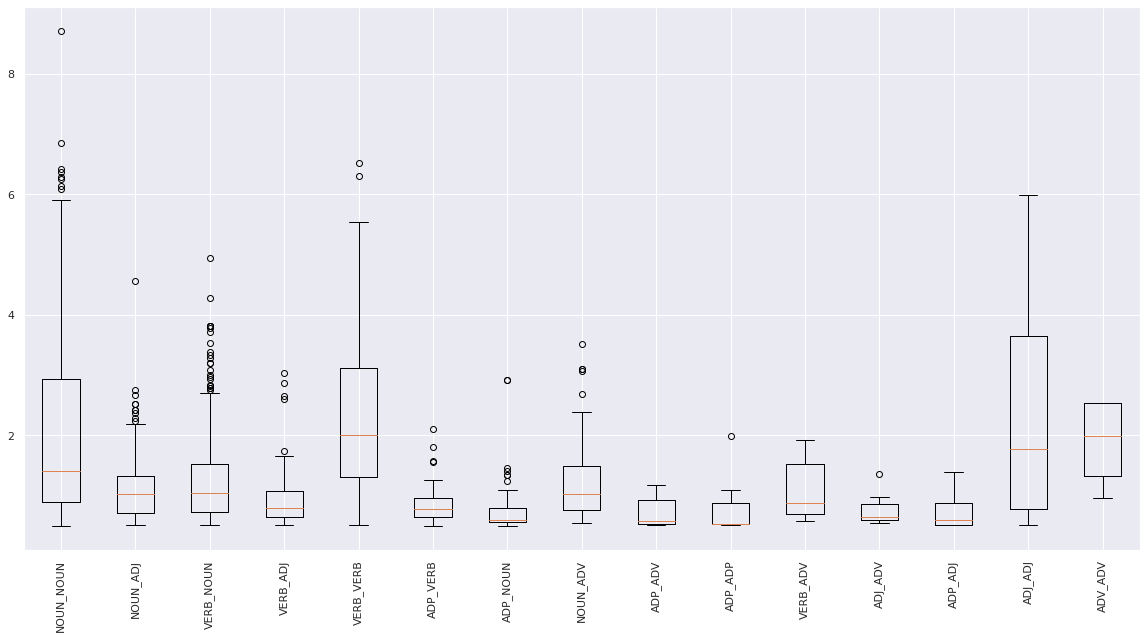

In [60]:
data_final0=[]

# or backwards compatable    
labels0, data0 = dict0.keys(), list(dict0.values())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0) + 1), labels0)
plt.show()

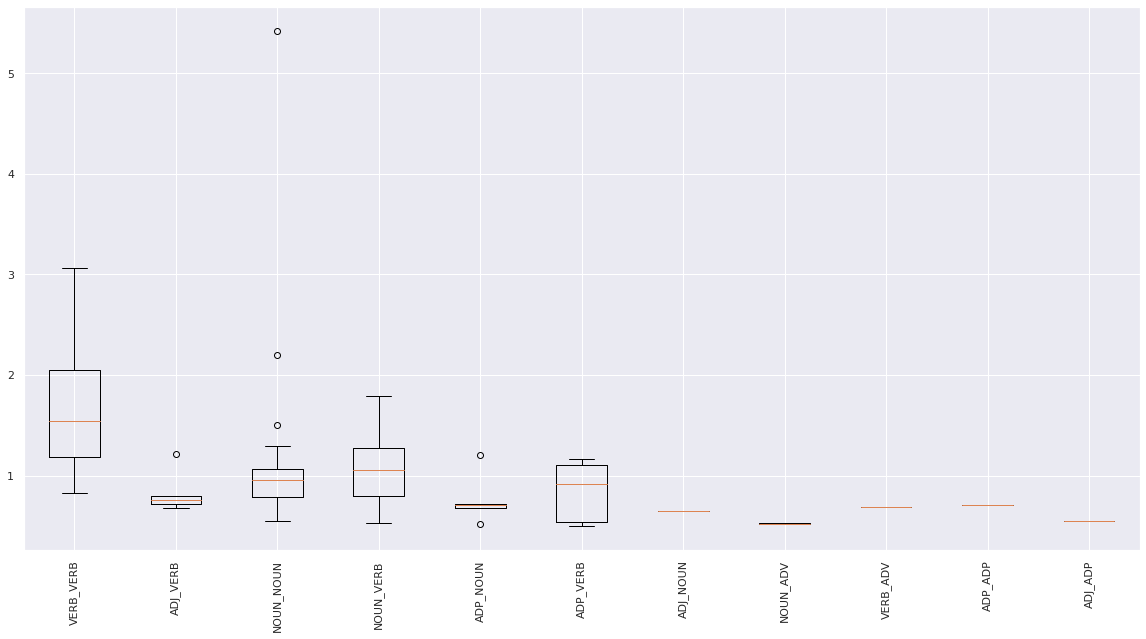

In [62]:
data_final1=[]
# or backwards compatable    
labels1, data1 = dict1.keys(), list(dict1.values())
for i in range(len(data1)):
    floats = [float(x) for x in data1[i]]
    data_final1.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1) + 1), labels1)
plt.show()

# Procesar los dataframe de forma global por muestreo y compararlos con target_prediction de acuerdo a los tipos de palabras que se alinearon

In [63]:
df_global=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [64]:
from itertools import chain
from collections import defaultdict

In [65]:
new_data = {'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
temp=df_global.copy()
for gp in muestreos:
    for f in tp:
        #obtener la matriz de alineamiento
        for pf in [0,1]:
            temp2=temp[(temp['etiqueta']==f) & (temp['paraphrase']==pf) & (temp['grupo']==gp)]
            dt_b = defaultdict(list)
            for index2,strings2 in temp2.iterrows():
                dt=strings2['datos']
                for k, v in chain(dt.items()):
                    dt_b[k].append(v)
            new_data['grupo'].append(gp)
            new_data['datos'].append(dt_b)
            new_data['etiqueta'].append(f)
            new_data['paraphrase'].append(pf)
data_boxplot_global=pd.DataFrame(new_data)
data_boxplot_global.to_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [66]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [67]:
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
0,0.05,"{'NOUN_NOUN': [['3.9160376', '2.0703483', '1.1...",entailment_entailment,0
1,0.05,"{'VERB_VERB': [['1.7737613', '1.818018', '1.29...",entailment_entailment,1
2,0.05,"{'NOUN_NOUN': [['3.1743438', '0.52120584', '1....",contradiction_contradiction,0
3,0.05,"{'NOUN_NOUN': [['3.3506556', '1.2808188', '1.1...",contradiction_contradiction,1
4,0.05,"{'NOUN_NOUN': [['3.2146893', '1.0292666', '1.0...",neutral_contradiction,0
...,...,...,...,...
121,1,"{'NOUN_NOUN': [['1.9776106', '0.84690475', '1....",contradiction_entailment,1
122,1,"{'NOUN_NOUN': [['1.9207357', '0.53879076', '3....",entailment_contradiction,0
123,1,"{'NOUN_NOUN': [['0.5009664', '1.1916567', '1.4...",entailment_contradiction,1
124,1,"{'NOUN_NOUN': [['2.5707574', '1.497951', '2.06...",contradiction_neutral,0


In [68]:
dict0_g=data_boxplot_global['datos'][0]
dict1_g=data_boxplot_global['datos'][1]
dict2_g=data_boxplot_global['datos'][2]
dict3_g=data_boxplot_global['datos'][3]
dict4_g=data_boxplot_global['datos'][4]
dict5_g=data_boxplot_global['datos'][5]

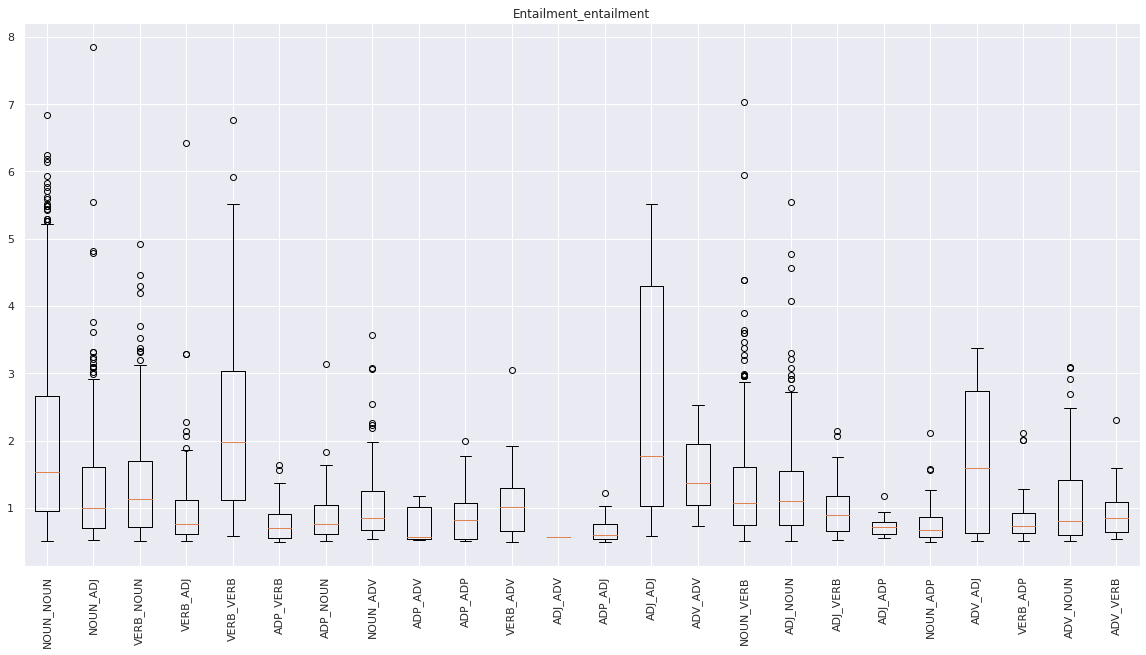

In [69]:
data_final0g=[]

# or backwards compatable    
labels0g, data0g = dict0_g.keys(), list(dict0_g.values())
for i in range(len(data0g)):
    for j in range(len(data0g[i])):
        floats = [float(x) for x in data0g[i][j]]
    data_final0g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0g) + 1), labels0g)
plt.title("Entailment_entailment")
plt.show()

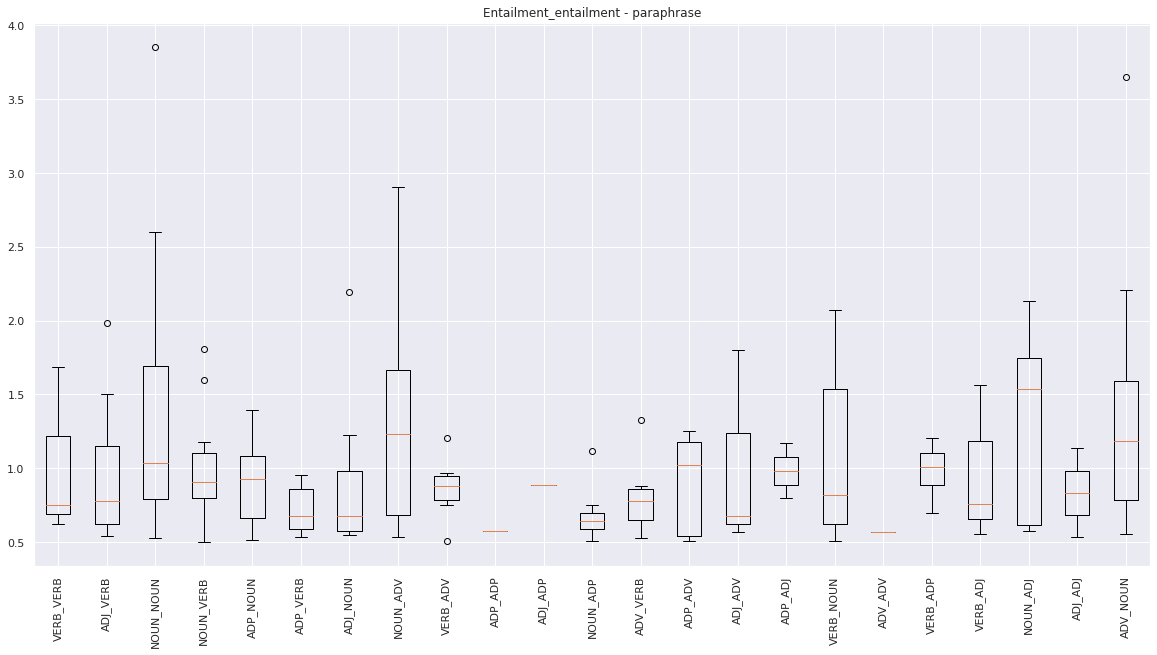

In [70]:
data_final1g=[]

# or backwards compatable    
labels1g, data1g = dict1_g.keys(), list(dict1_g.values())
for i in range(len(data1g)):
    for j in range(len(data1g[i])):
        floats = [float(x) for x in data1g[i][j]]
    data_final1g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1g) + 1), labels1g)
plt.title("Entailment_entailment - paraphrase")
plt.show()

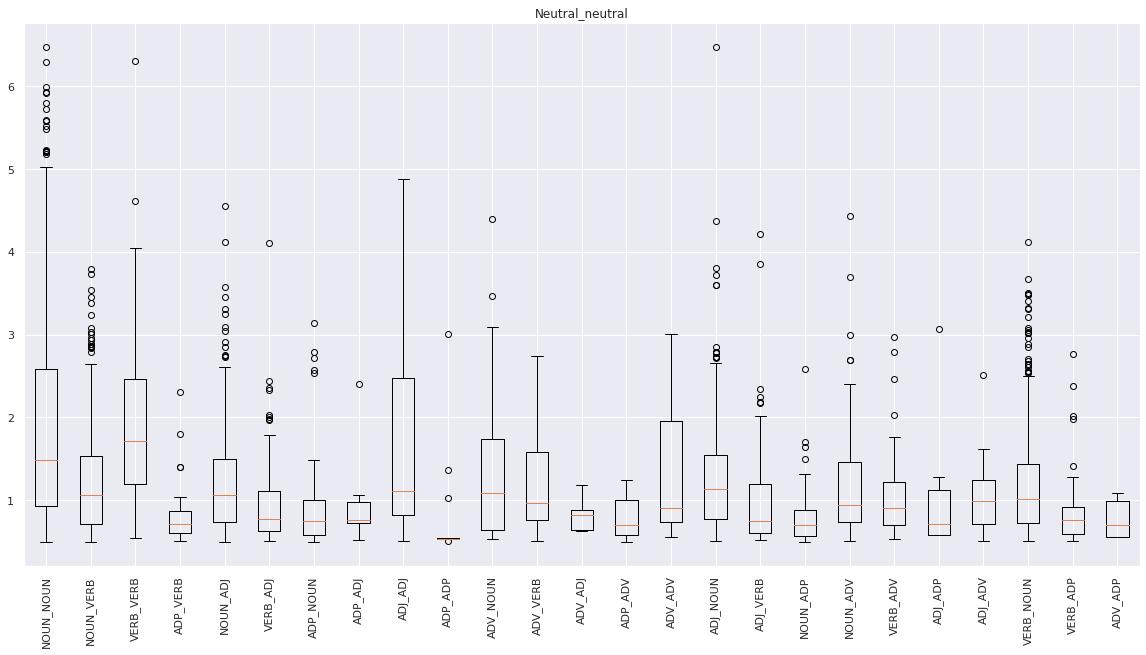

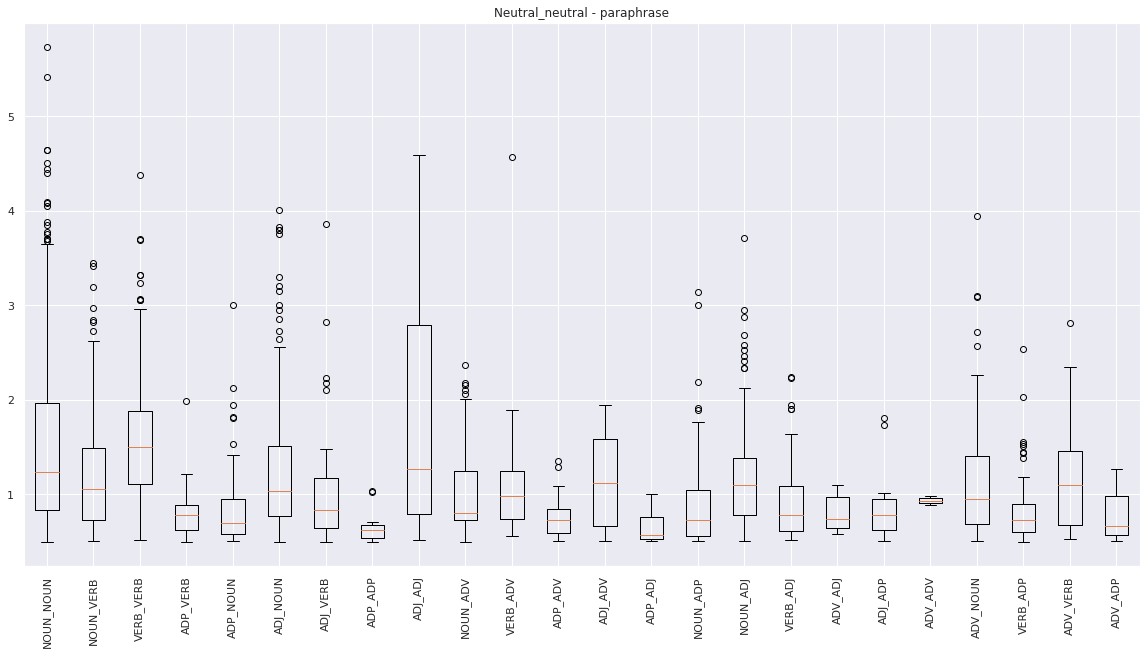

In [71]:
data_final2g=[]

# or backwards compatable    
labels2g, data2g = dict2_g.keys(), list(dict2_g.values())
for i in range(len(data2g)):
    for j in range(len(data2g[i])):
        floats = [float(x) for x in data2g[i][j]]
    data_final2g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final2g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels2g) + 1), labels2g)
plt.title("Neutral_neutral")
plt.show()

data_final3g=[]

# or backwards compatable    
labels3g, data3g = dict3_g.keys(), list(dict3_g.values())
for i in range(len(data3g)):
    for j in range(len(data3g[i])):
        floats = [float(x) for x in data3g[i][j]]
    data_final3g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final3g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels3g) + 1), labels3g)
plt.title("Neutral_neutral - paraphrase")
plt.show()

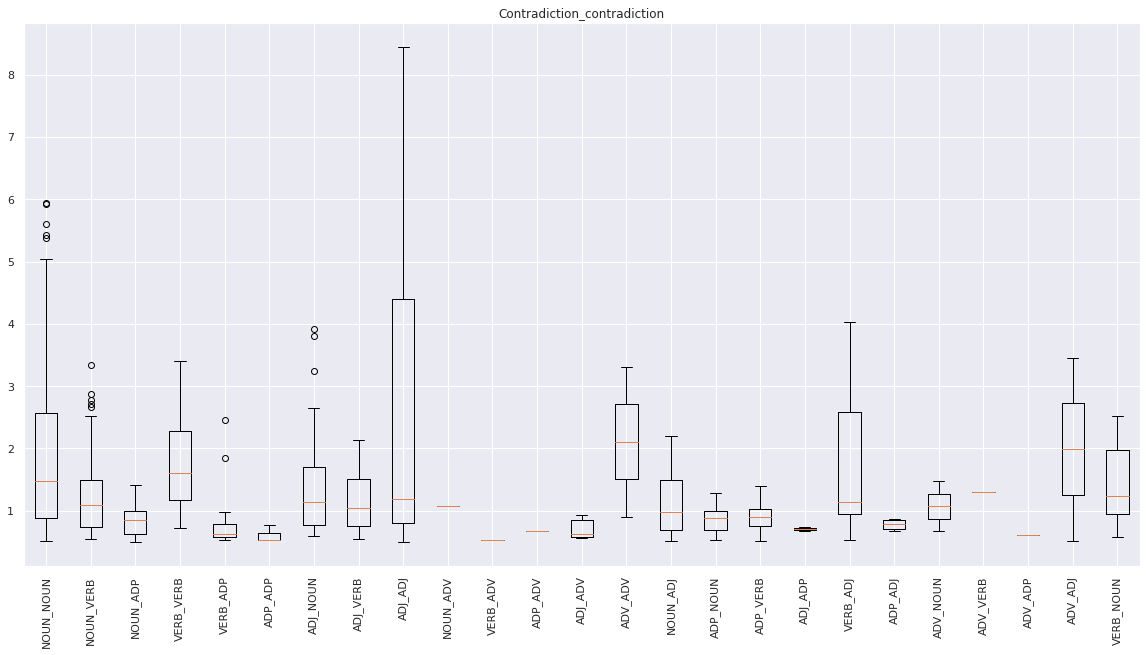

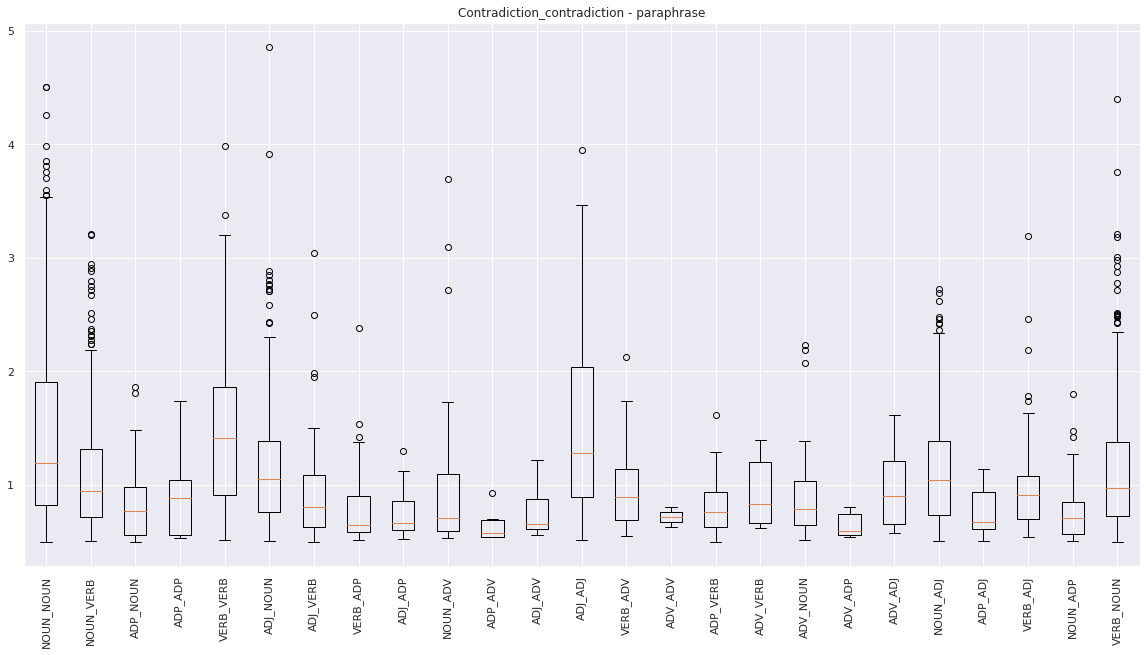

In [72]:
data_final4g=[]

# or backwards compatable    
labels4g, data4g = dict4_g.keys(), list(dict4_g.values())
for i in range(len(data4g)):
    for j in range(len(data4g[i])):
        floats = [float(x) for x in data4g[i][j]]
    data_final4g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final4g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels4g) + 1), labels4g)
plt.title("Contradiction_contradiction")
plt.show()

data_final5g=[]

# or backwards compatable    
labels5g, data5g = dict5_g.keys(), list(dict5_g.values())
for i in range(len(data5g)):
    for j in range(len(data5g[i])):
        floats = [float(x) for x in data5g[i][j]]
    data_final5g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final5g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels5g) + 1), labels5g)
plt.title("Contradiction_contradiction - paraphrase")
plt.show()

# vamos a crear los mapas de calor con conteos de los valores por tipo de palabras que tienen un alineamiento mayor al umbral

In [73]:
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
0,0.05,"{'NOUN_NOUN': [['3.9160376', '2.0703483', '1.1...",entailment_entailment,0
1,0.05,"{'VERB_VERB': [['1.7737613', '1.818018', '1.29...",entailment_entailment,1
2,0.05,"{'NOUN_NOUN': [['3.1743438', '0.52120584', '1....",contradiction_contradiction,0
3,0.05,"{'NOUN_NOUN': [['3.3506556', '1.2808188', '1.1...",contradiction_contradiction,1
4,0.05,"{'NOUN_NOUN': [['3.2146893', '1.0292666', '1.0...",neutral_contradiction,0
...,...,...,...,...
121,1,"{'NOUN_NOUN': [['1.9776106', '0.84690475', '1....",contradiction_entailment,1
122,1,"{'NOUN_NOUN': [['1.9207357', '0.53879076', '3....",entailment_contradiction,0
123,1,"{'NOUN_NOUN': [['0.5009664', '1.1916567', '1.4...",entailment_contradiction,1
124,1,"{'NOUN_NOUN': [['2.5707574', '1.497951', '2.06...",contradiction_neutral,0


# Generar los mapas de calor por muestreo

In [74]:
lista_mapas=[]
lista_nombres=[]

In [75]:
for index, strings in data_boxplot_global.iterrows():
    p_df=pd.DataFrame(0,columns=pos,index=pos)
    for k,v in strings['datos'].items():
        indice=k.split('_')[0]
        columna=k.split('_')[1]
        p_df.at[indice,columna]=len(v)
    lista_mapas.append(p_df.copy())
    lista_nombres.append(strings['grupo']+' - '+strings['etiqueta']+'s - '+str(strings['paraphrase']))
    #sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.0f',ax=axes[j,i]).set(title=strings['grupo']+' - '+strings['etiqueta']+' - '+str(strings['paraphrase']))
#plt.show()

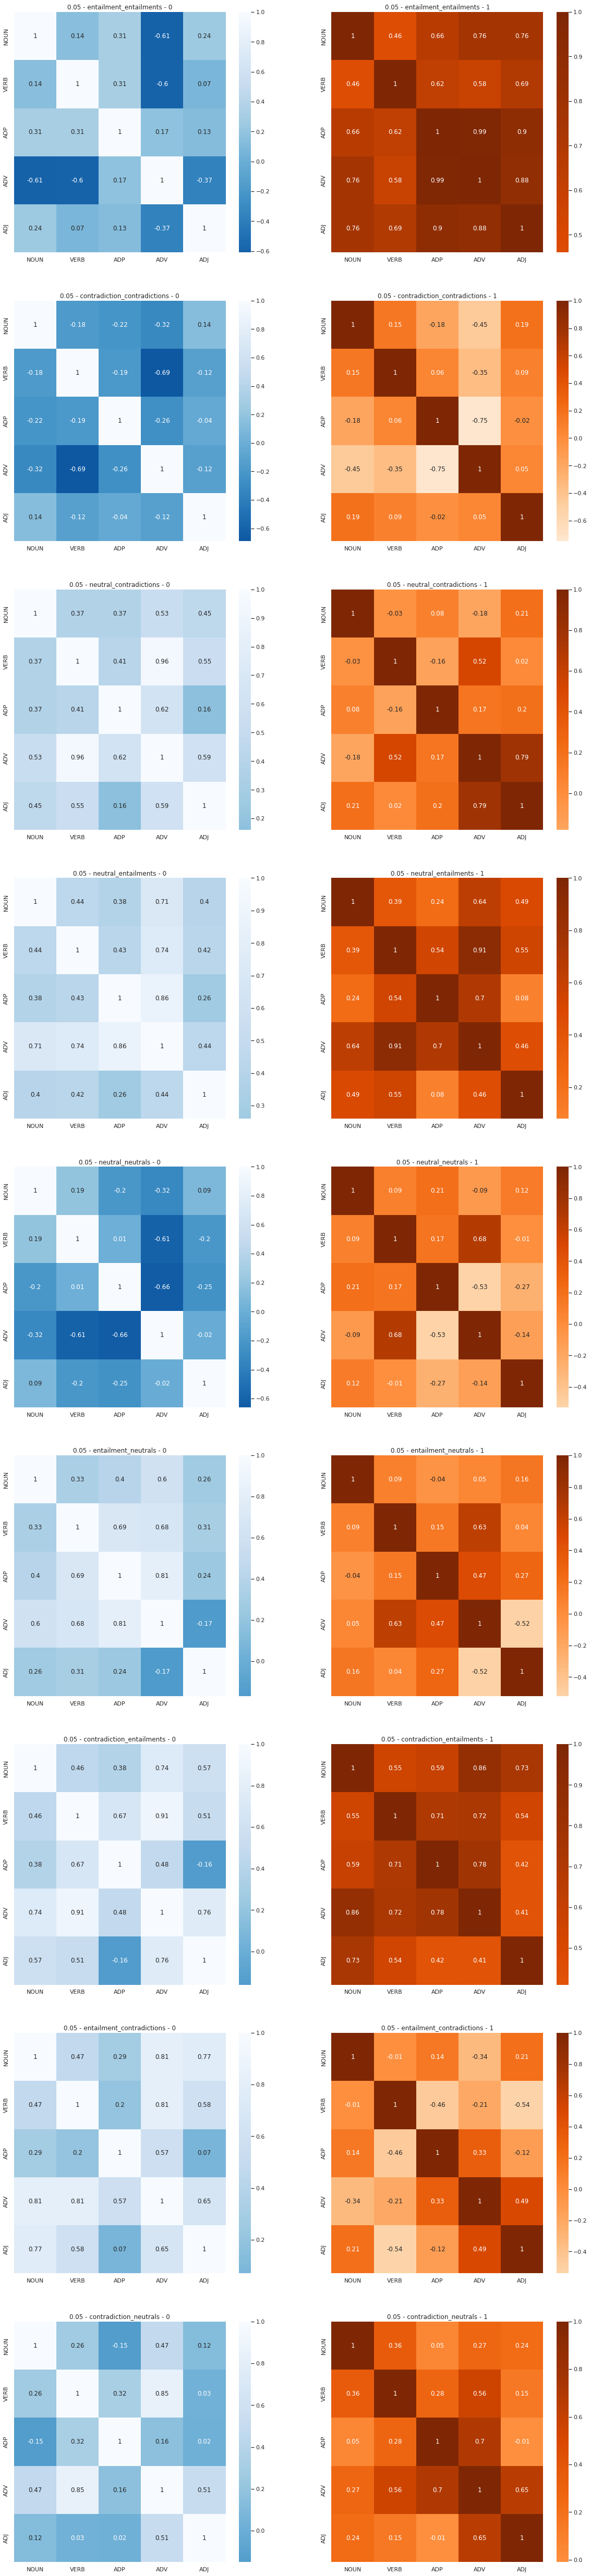

In [76]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i].corr().round(2), center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1].corr().round(2), center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [77]:
print(lista_mapas[2].corr().round(2))
print(lista_nombres[2])

      NOUN  VERB   ADP   ADV   ADJ
NOUN  1.00 -0.18 -0.22 -0.32  0.14
VERB -0.18  1.00 -0.19 -0.69 -0.12
ADP  -0.22 -0.19  1.00 -0.26 -0.04
ADV  -0.32 -0.69 -0.26  1.00 -0.12
ADJ   0.14 -0.12 -0.04 -0.12  1.00
0.05 - contradiction_contradictions - 0


<AxesSubplot:>

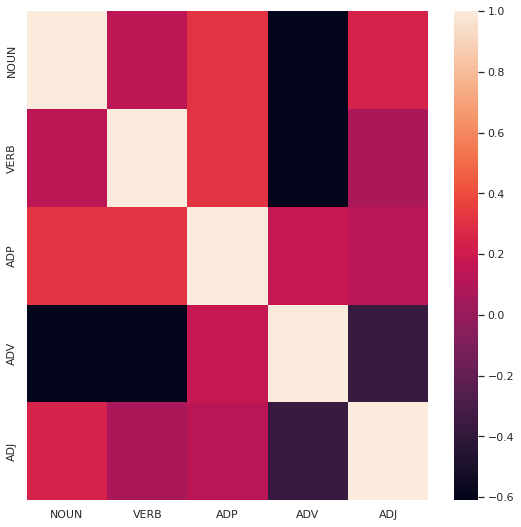

In [78]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[0].corr().round(2))

<AxesSubplot:>

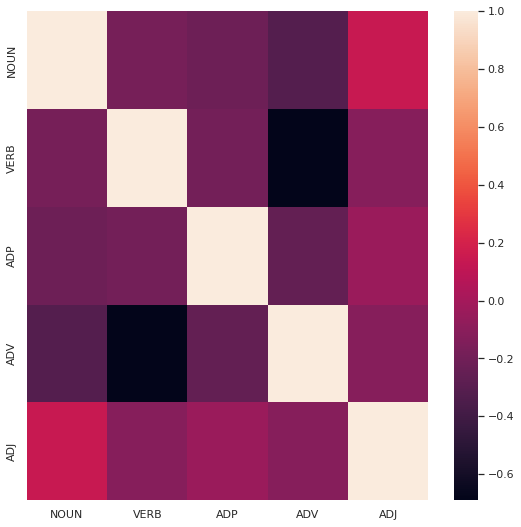

In [79]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[2].corr().round(2))

In [80]:
import stat

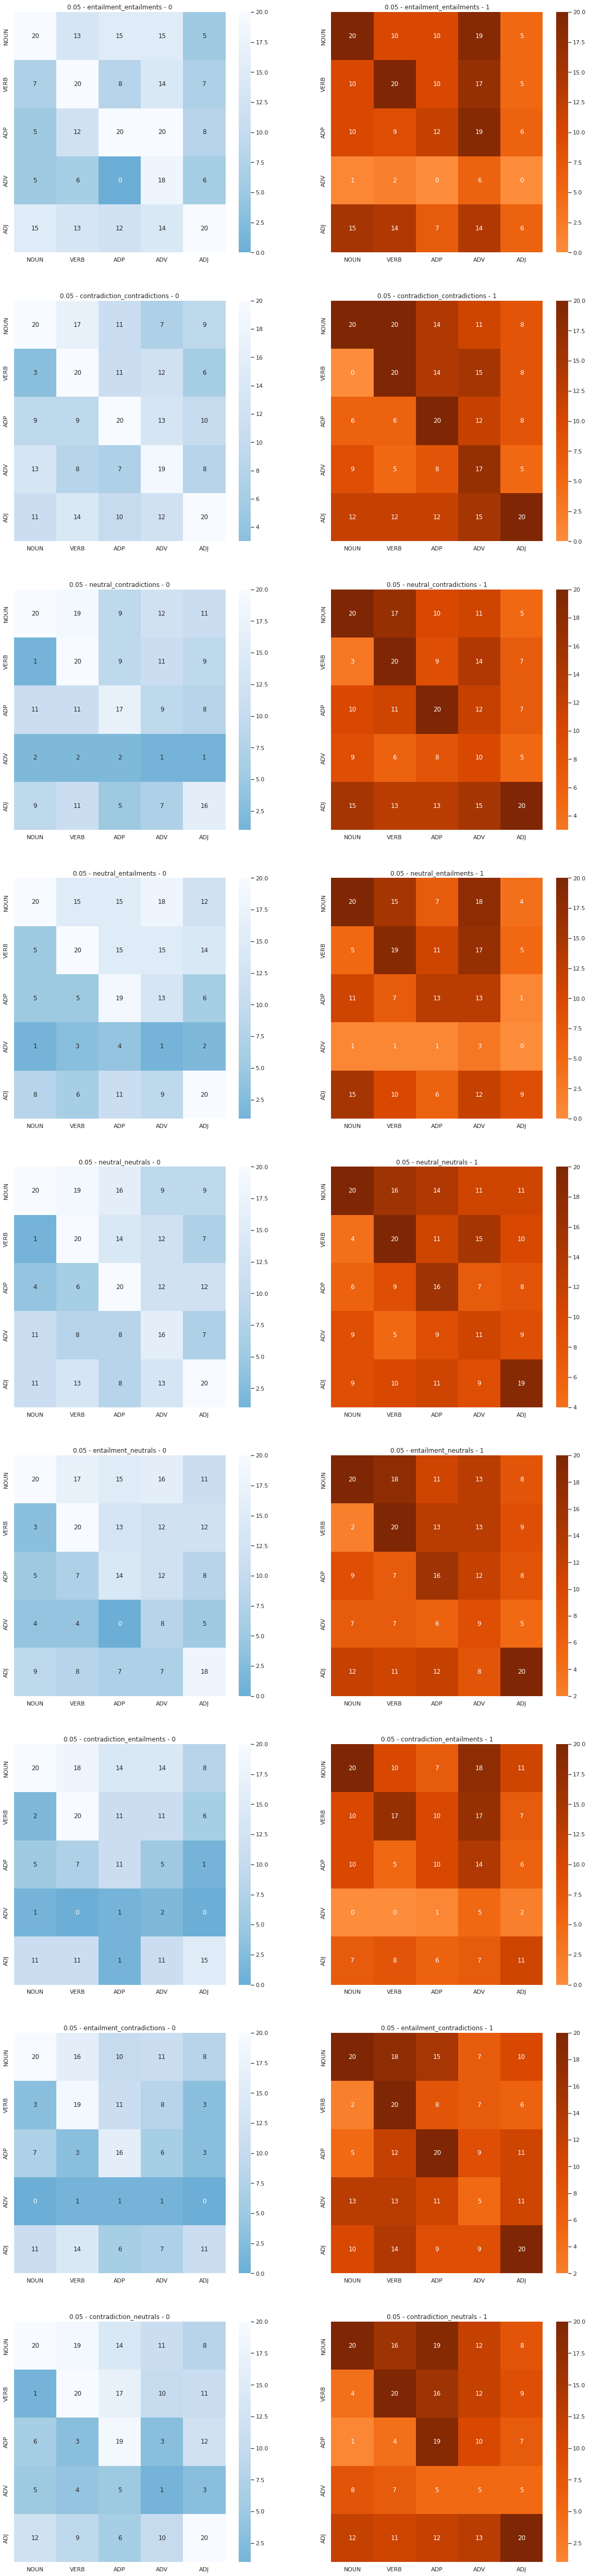

In [81]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

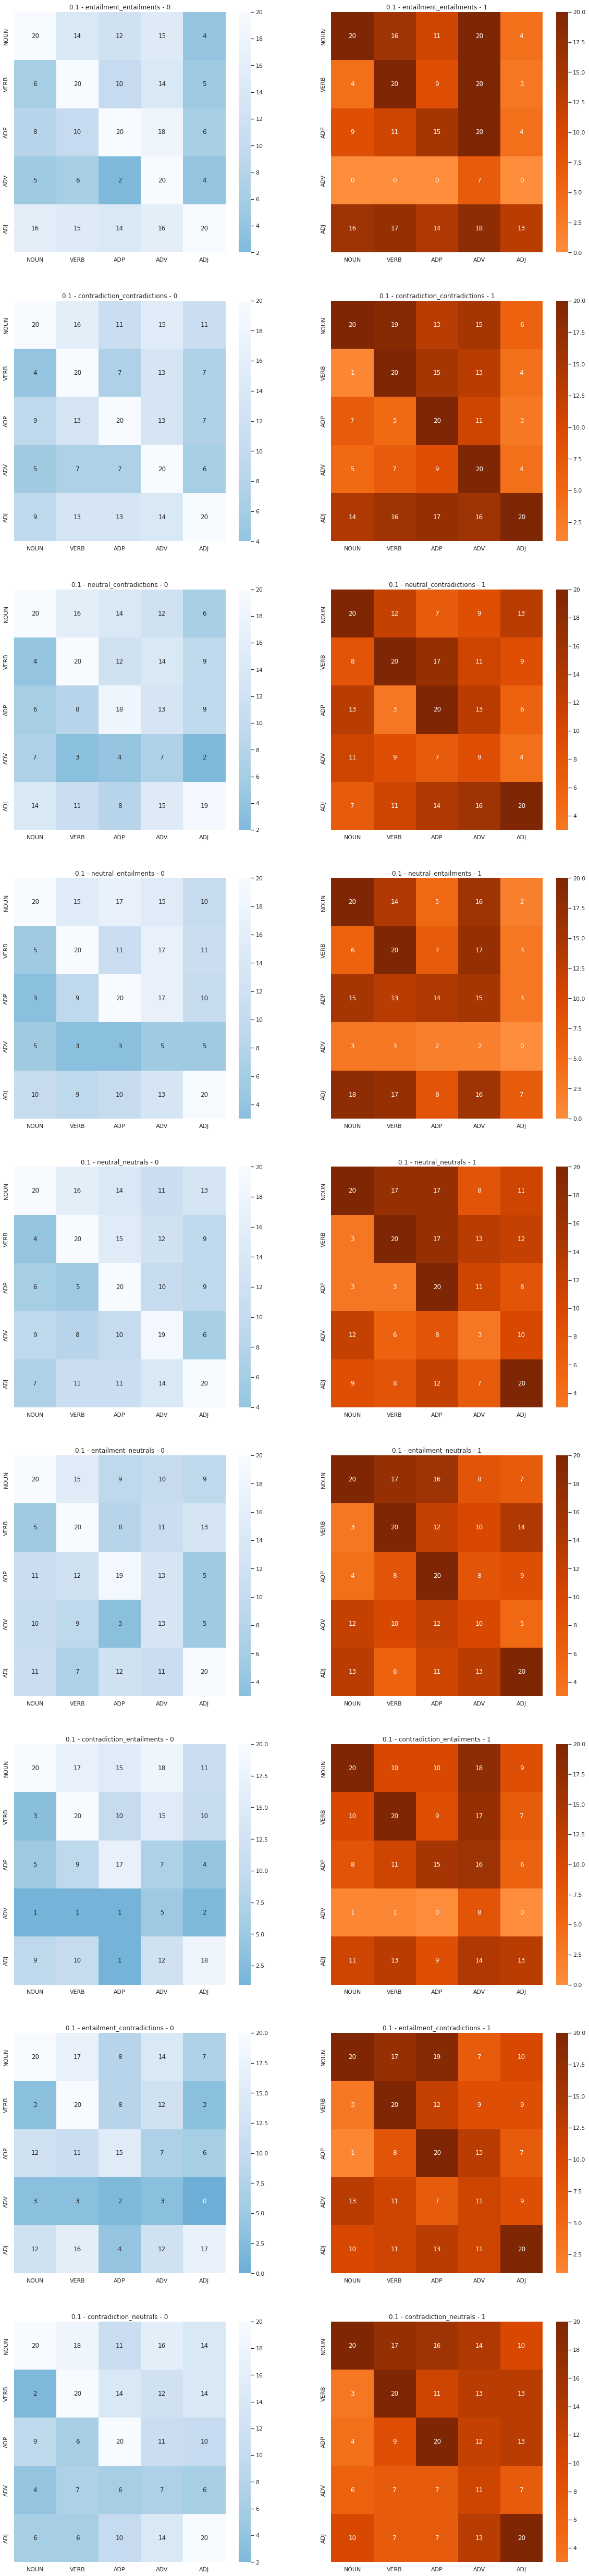

In [82]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(18,36,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

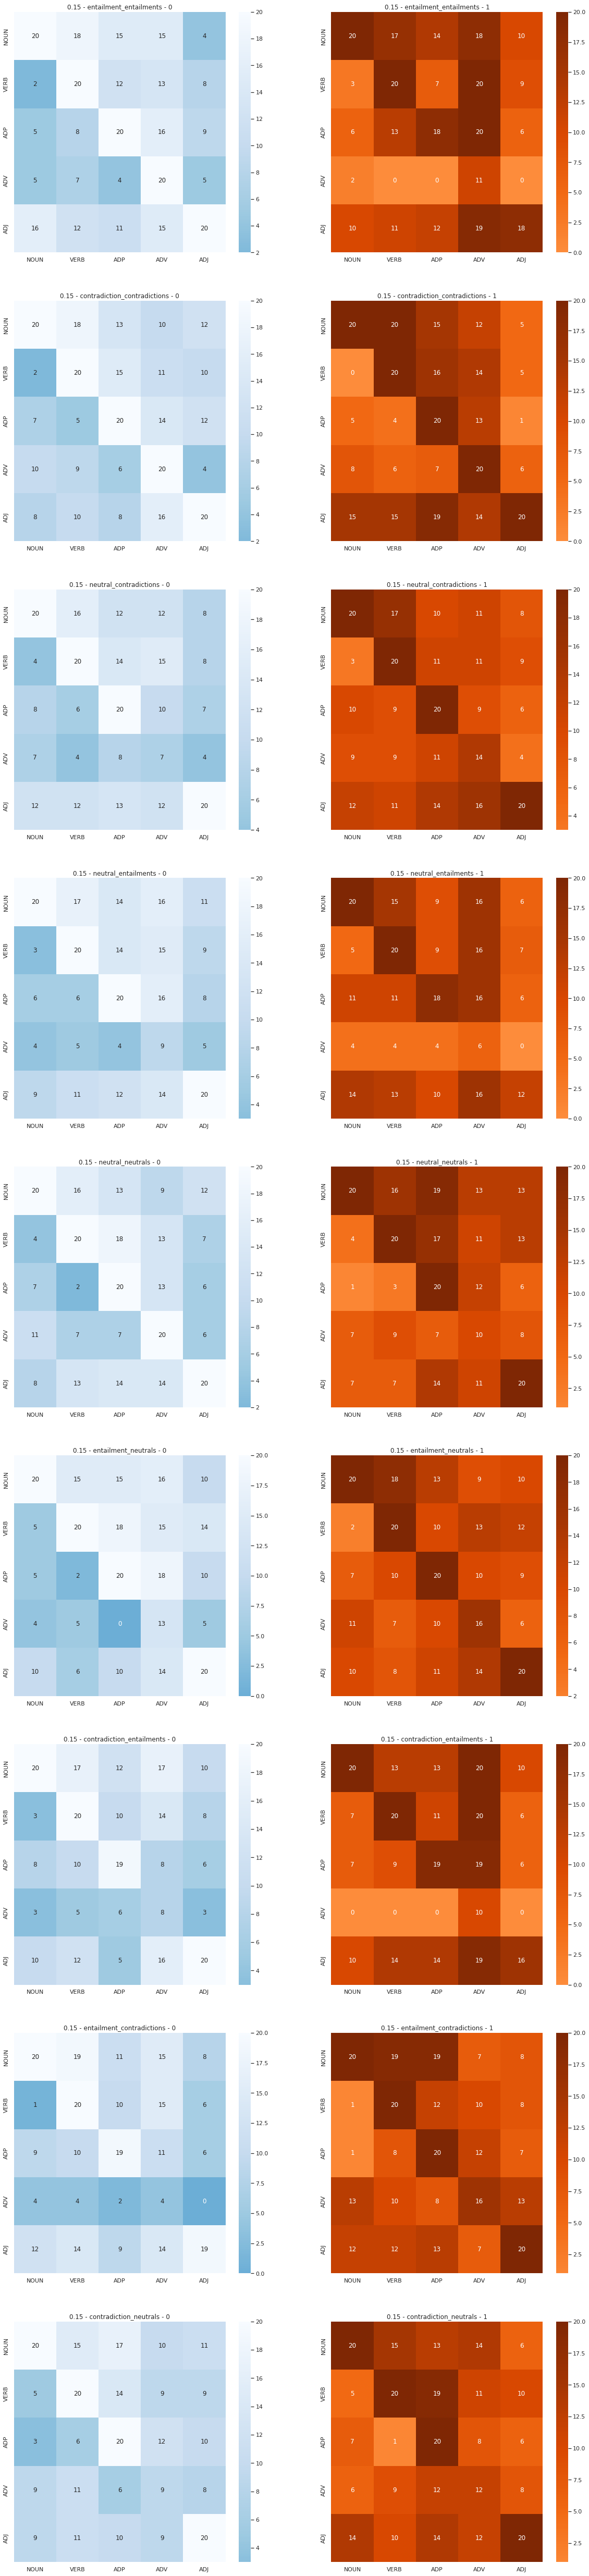

In [83]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(36,54,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

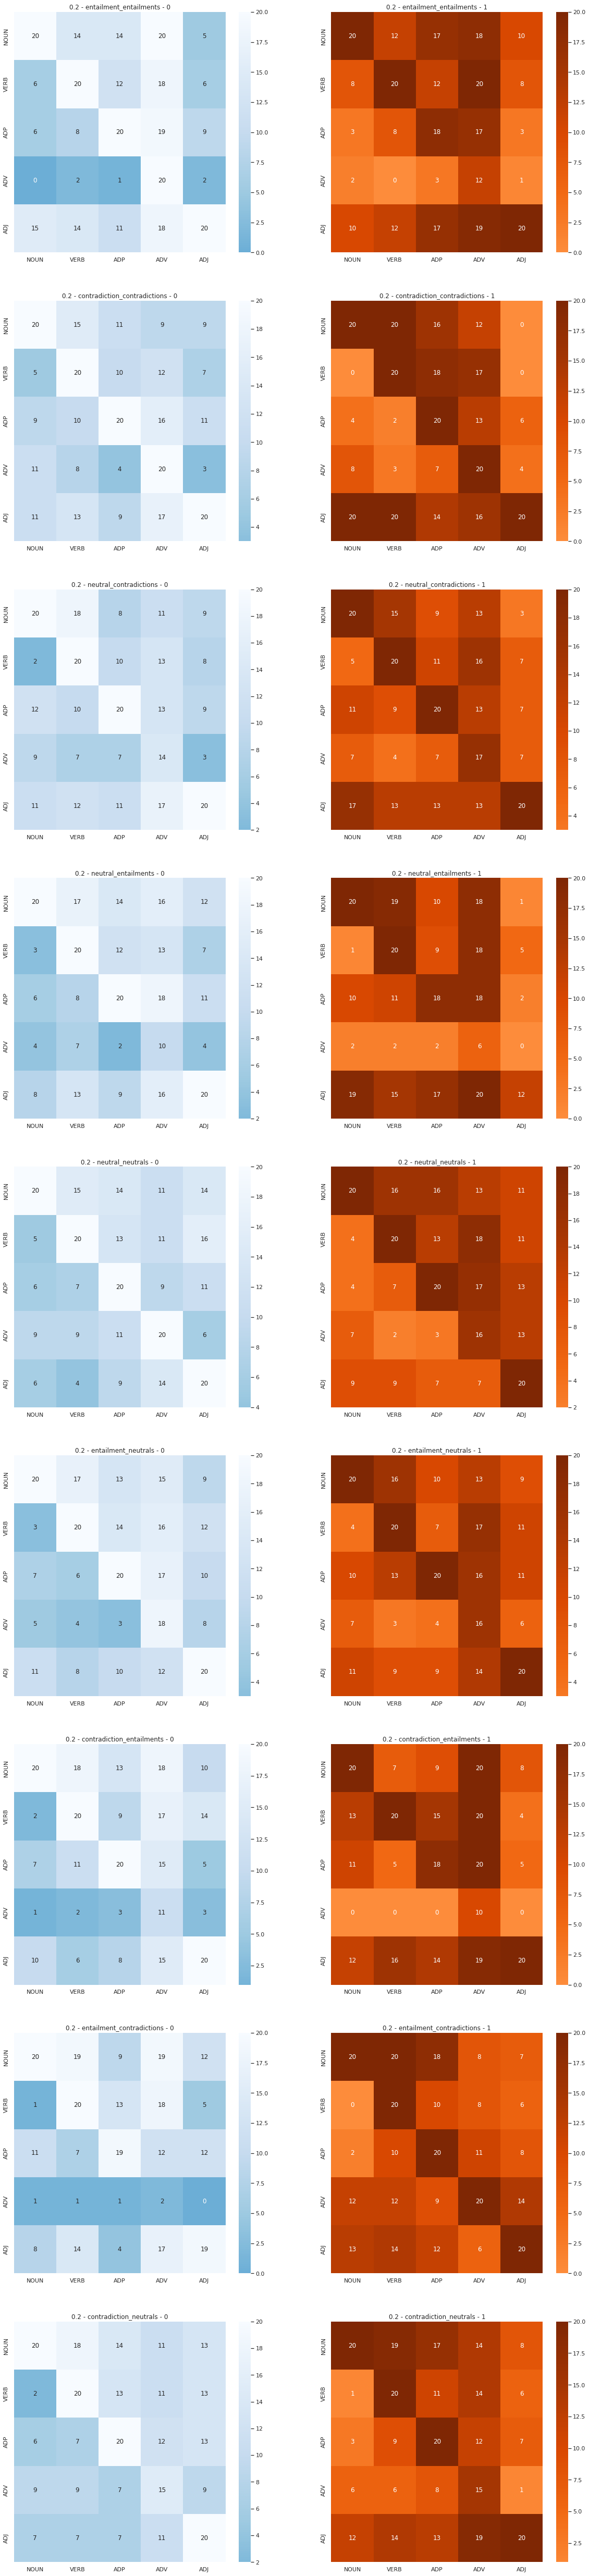

In [84]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(54,72,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

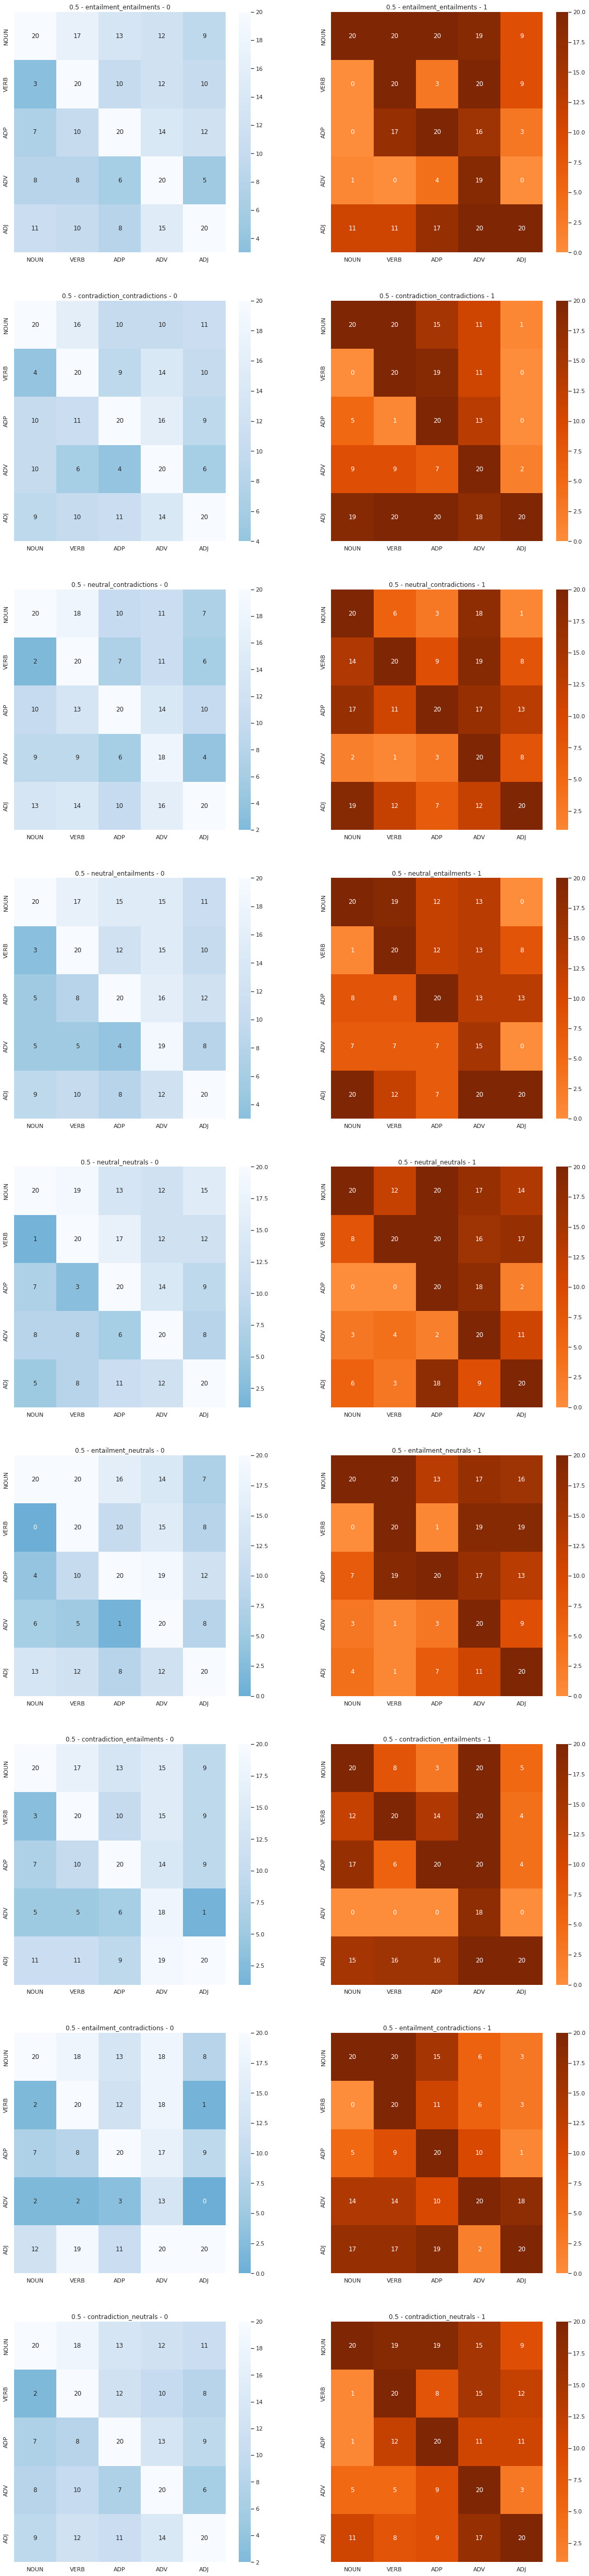

In [85]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(72,90,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

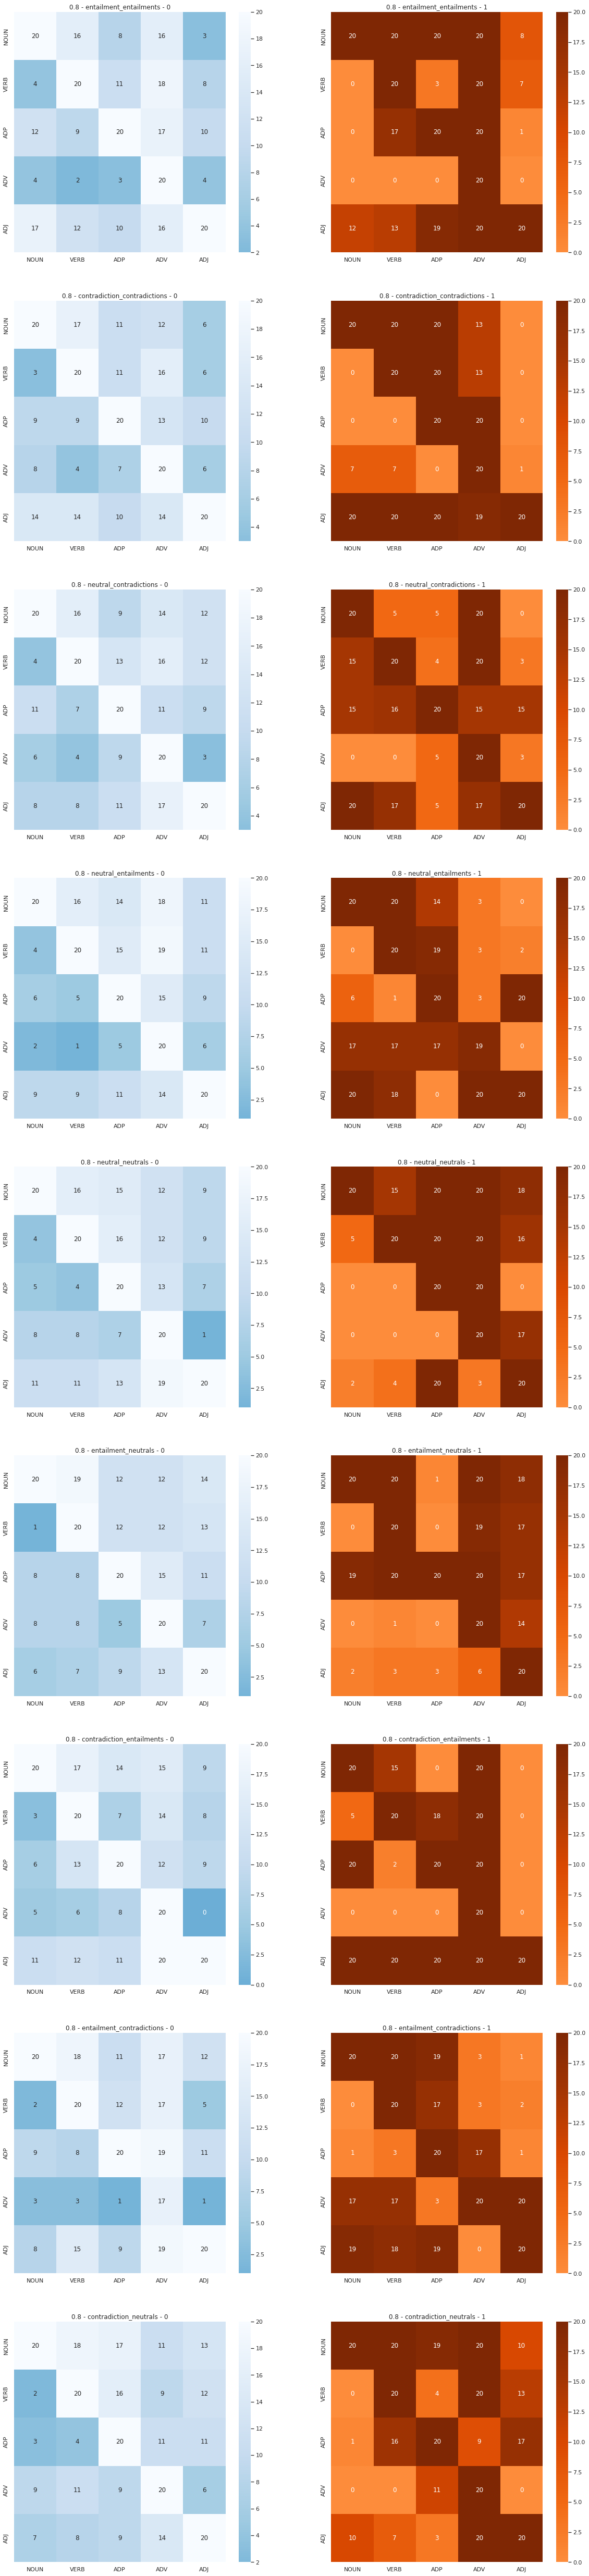

In [86]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(90,108,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

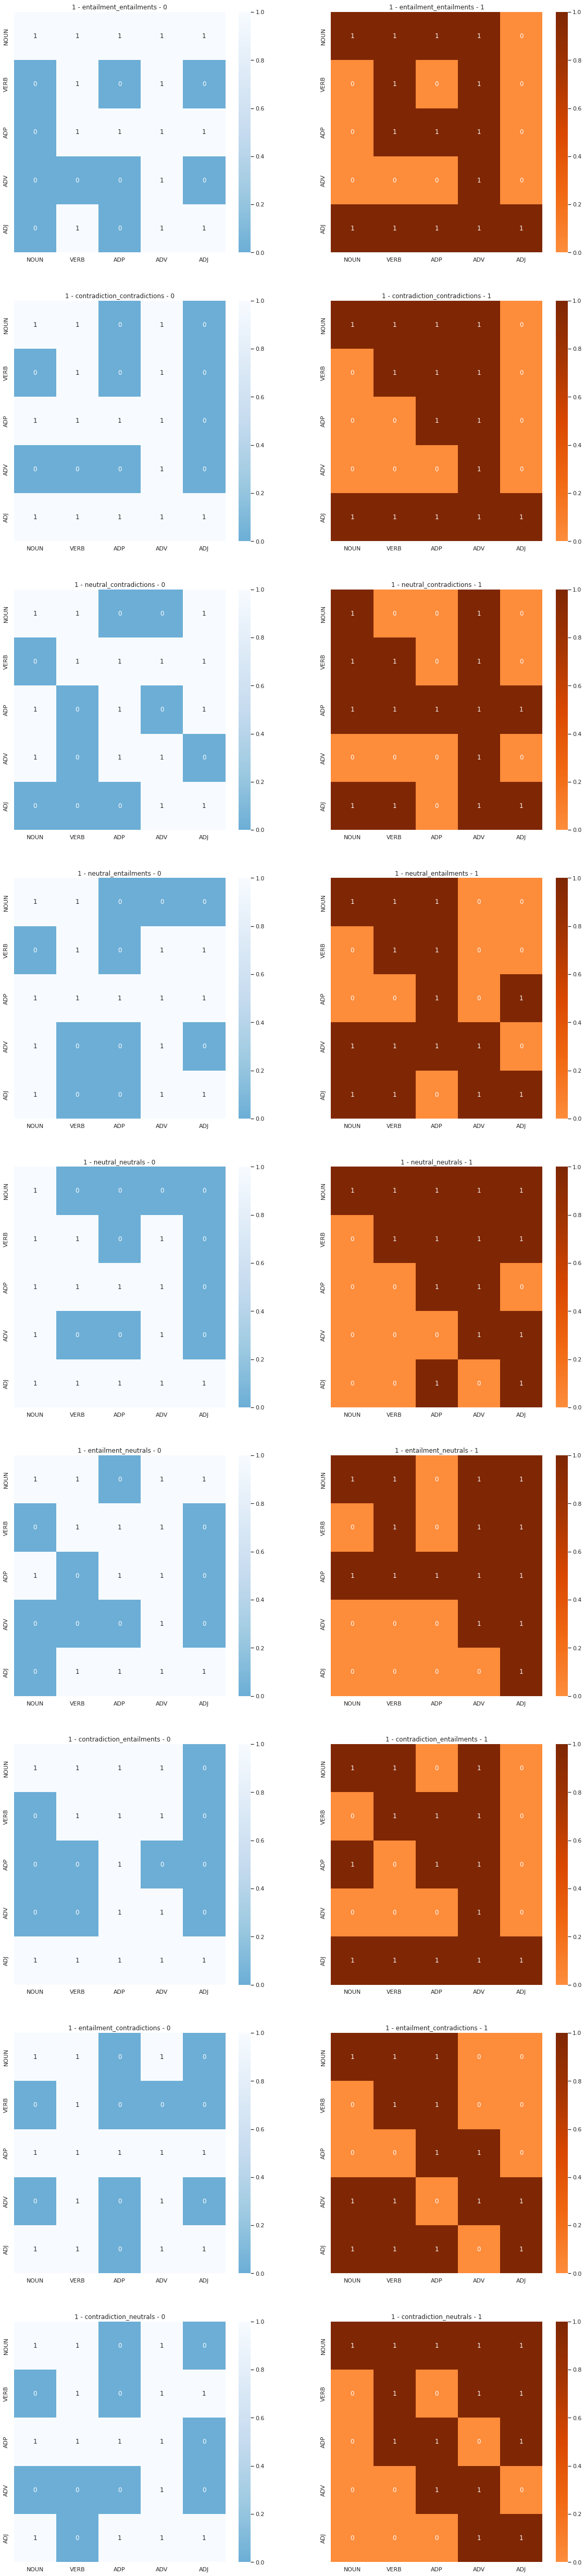

In [87]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(108,126,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [88]:
lista_mapas[108]

,NOUN,VERB,ADP,ADV,ADJ
NOUN,1,1,1,1,1
VERB,0,1,0,1,0
ADP,0,1,1,1,1
ADV,0,0,0,1,0
ADJ,0,1,0,1,1
